In [1]:
import numpy as np
import pandas as pd
import os
import glob

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

directory = 'D:/OneDrive/EM-AnxDep/Data/'
cond = '2x2'

nameList = []
fileList = os.listdir(directory + cond)
#pathList = glob.glob('E:/Py/EGC Mood/' + block + '/' + cond + '/*.txt') #Use if separating by block
pathList = glob.glob(directory + cond + '/*.txt') #Use if block irrelevant

for f in fileList:
    name = f[:3]
    nameList.append(name)
    
df_2x2 = {}
for k, v in zip(nameList,pathList):
    df_2x2[k] = pd.read_csv(v, sep='\t', header=0, index_col=0, skipfooter=1, engine='python')

In [2]:
# Image types/numbers

# Anxiety (F, T)
A_Imgs = ['001', '002', '003', '004', '007', '008', '009', '010']
# Depressive (0, N)
D_Imgs = ['013', '014', '015', '016', '019', '020', '021', '022']
# Positive/Neutral
N_Imgs = ['025', '026', '027', '028', '029', '030', '031', '032']

# Participant groups:

### GROUP 1 (Prelim) ###
#HighA = [8, 9, 11, 13, 16, 31, 36, 37, 39, 41, 49, 53, 58, 59] #N=14
#LowA = [1, 5, 7, 10, 14, 15, 17, 18, 19, 23, 24, 25, 26, 27, 28, 32, 45, 48, 50, 52, 61] #N=21
#HighD = [11, 13, 16, 36, 41, 43, 53, 58] #N=8
#LowD = [1, 10, 17, 18, 21, 23, 24, 25, 26, 28, 34, 39, 44, 51, 52, 57, 59, 61, 64] #N=19

### GROUP 2 (Extreme scores) ###
HighA = [9, 13, 16, 36, 37, 39, 41, 49, 53, 58]
LowA = [1, 5, 7, 10, 14, 18, 19, 23, 28, 32, 45, 48, 50, 52, 61] 
HighD = [36, 39, 41, 43, 53, 58]
LowD = [2, 10, 18, 21, 24, 25, 28, 34, 48, 51, 52, 57, 59, 61, 64]

### GROUP 3 (Extreme High vs all others) ###


### Anxiety

In [221]:
# Rename columns for all Anxiety Images
for f in A_Imgs:
    df_2x2[f].columns = ['TFD_0_1','TFD_0_2','TFD_F','TFD_T','FC_0_1','FC_0_2','FC_F','FC_T','TVD_0_1','TVD_0_2','TVD_F','TVD_T','VC_0_1','VC_0_2','VC_F','VC_T']

# Convert subframes for separate stimuli into one large dataframe
frames = [df_2x2['001'],df_2x2['002'],df_2x2['003'],df_2x2['004'],df_2x2['007'],df_2x2['008'],df_2x2['009'],df_2x2['010']]
df_A = pd.concat(frames, keys=A_Imgs)
# Convert stimulus (Img) index into a column, keep participant IDs as index (for easy selection)
df_A.index.names = ['Img','P']
df_A = df_A.reset_index(level='Img')

In [222]:
# Average multiples (neutral imgs)
df_A['TFD_0'] = (df_A['TFD_0_1']+df_A['TFD_0_2'])/2
df_A['FC_0'] = (df_A['FC_0_1']+df_A['FC_0_2'])/2
df_A['TVD_0'] = (df_A['TVD_0_1']+df_A['TVD_0_2'])/2
df_A['VC_0'] = (df_A['VC_0_1']+df_A['VC_0_2'])/2
# Drop old (not necessary)
#df_A.drop(['TFD_0_1','TFD_0_2','FC_0_1','FC_0_2','TVD_0_1','TVD_0_2','VC_0_1','VC_0_2'], axis=1)

HighA_TFD = df_A.loc[HighA,['TFD_F','TFD_T','TFD_0']]
HighA_FC = df_A.loc[HighA, ['FC_F','FC_T','FC_0']]
LowA_TFD = df_A.loc[LowA, ['TFD_F','TFD_T','TFD_0']]
LowA_FC = df_A.loc[LowA, ['FC_F','FC_T','FC_0']]
HighA_TVD = df_A.loc[HighA,['TVD_F','TVD_T','TVD_0']]
HighA_VC = df_A.loc[HighA, ['VC_F','VC_T','VC_0']]
LowA_TVD = df_A.loc[LowA, ['TVD_F','TVD_T','TVD_0']]
LowA_VC = df_A.loc[LowA, ['VC_F','VC_T','VC_0']]

In [258]:
# Create melted df for plotting
_HighA_TFD = HighA_TFD.melt(var_name='Stimulus',value_name='TFD')
_HighA_TFD['Group'] = "High"
_LowA_TFD = LowA_TFD.melt(var_name='Stimulus',value_name='TFD')
_LowA_TFD['Group'] = 'Low'
A_TFD = pd.concat([_HighA_TFD, _LowA_TFD])

_HighA_FC = HighA_FC.melt(var_name='Stimulus',value_name='Fix Count')
#_HighA_FC['Group'] = "High"
_LowA_FC = LowA_FC.melt(var_name='Stimulus',value_name='Fix Count')
#_LowA_FC['Group'] = 'Low'
A_FC = pd.concat([_HighA_FC, _LowA_FC])

_HighA_TVD = HighA_TVD.melt(var_name='Stimulus',value_name='TVD')
#_HighA_TVD['Group'] = "High"
_LowA_TVD = LowA_TVD.melt(var_name='Stimulus',value_name='TVD')
#_LowA_TVD['Group'] = 'Low'
A_TVD = pd.concat([_HighA_TVD, _LowA_TVD])

_HighA_VC = HighA_VC.melt(var_name='Stimulus',value_name='Visit Count')
#_HighA_VC['Group'] = "High"
_LowA_VC = LowA_VC.melt(var_name='Stimulus',value_name='Visit Count')
#_LowA_VC['Group'] = 'Low'
A_VC = pd.concat([_HighA_VC, _LowA_VC])

A_EM = pd.concat([A_TFD,A_FC,A_TVD,A_VC], axis=1)

In [261]:
A_EM.head()

,Stimulus,TFD,Group,Stimulus,Fix Count,Stimulus,TVD,Stimulus,Visit Count,GroupCode
0,TFD_F,1.23,High,FC_F,5.0,TVD_F,1.30,VC_F,2.0,1
1,TFD_F,1.13,High,FC_F,2.0,TVD_F,1.13,VC_F,2.0,1
2,TFD_F,1.40,High,FC_F,5.0,TVD_F,1.45,VC_F,2.0,1
3,TFD_F,1.92,High,FC_F,6.0,TVD_F,2.05,VC_F,1.0,1
4,TFD_F,2.20,High,FC_F,7.0,TVD_F,2.28,VC_F,2.0,1


In [265]:
A_EM['GroupCode'] = A_EM['Group'].map(lambda x: "1" if "High" in x else "0" if "Low" in x else "")
A_EM['GroupCode'] = A_EM['GroupCode'].astype(int)

Anxiety: TFD


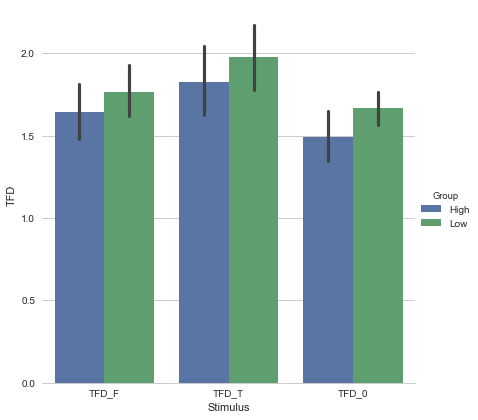

In [149]:
print('Anxiety: TFD')
sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='TFD', hue='Group', size=6, kind='bar', data=A_TFD)
_.despine(left=True)

Anxiety: Fix Count


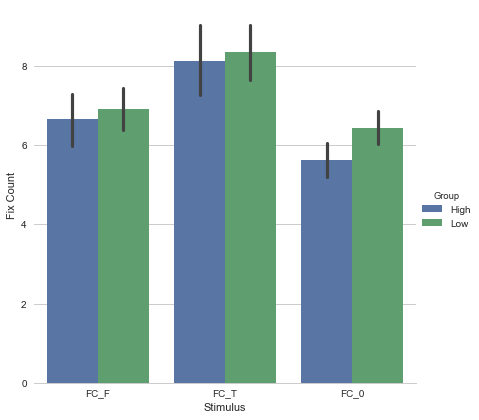

In [150]:
print('Anxiety: Fix Count')
sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='Fix Count', hue='Group', size=6, kind='bar', data=A_FC)
_.despine(left=True)

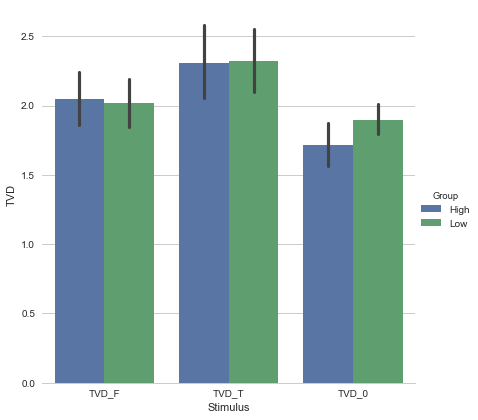

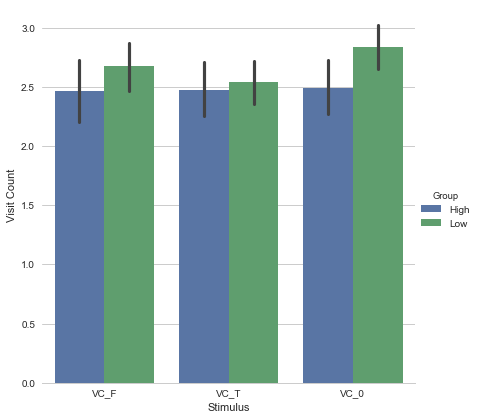

In [151]:

sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='TVD', hue='Group', size=6, kind='bar', data=A_TVD)
_.despine(left=True)

sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='Visit Count', hue='Group', size=6, kind='bar', data=A_VC)
_.despine(left=True)

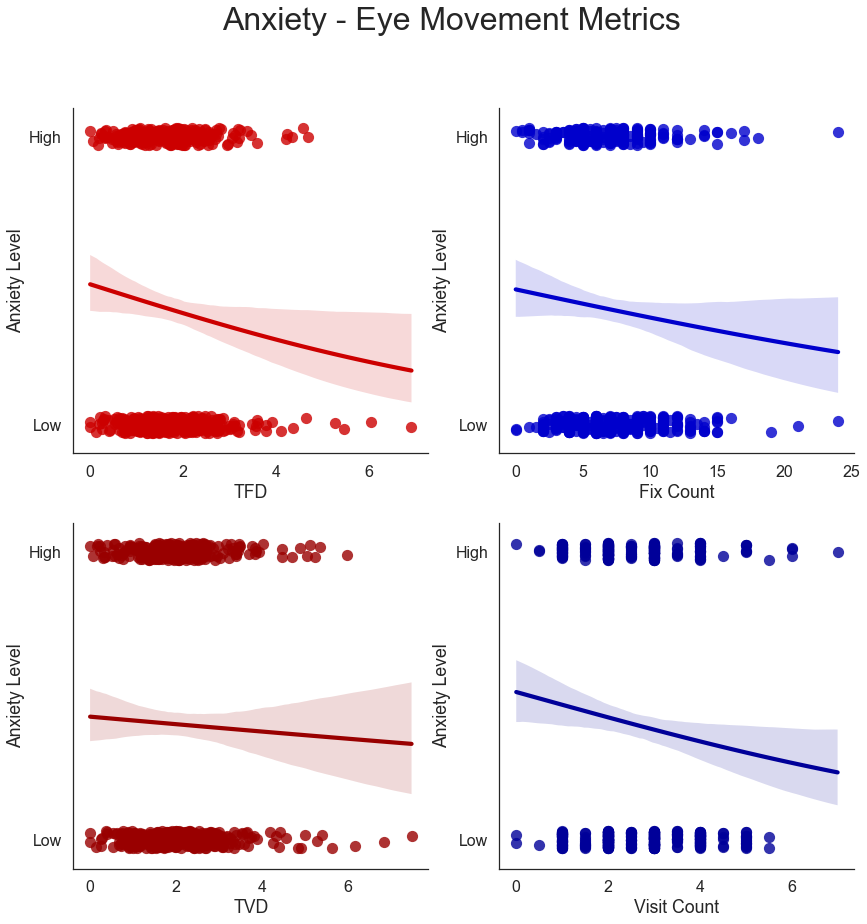

In [266]:
fig, ax = plt.subplots()
fig.set_size_inches(14,14)
plt.subplots_adjust(hspace=.2)
plt.suptitle('Anxiety - Eye Movement Metrics', fontsize=32)
plt.subplot(221)
_ = sns.set_style("white")
_ = sns.regplot(x='TFD',y='GroupCode',data=A_EM,y_jitter=.03, logistic=True, truncate=True, color='#cc0000')
_ = plt.ylabel('Anxiety Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

plt.subplot(222)
_ = sns.set_style("white")
_ = sns.regplot(x='Fix Count',y='GroupCode',data=A_EM,y_jitter=.03, logistic=True, truncate=True, color='#0000cc')
_ = plt.ylabel('Anxiety Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

plt.subplot(223)
_ = sns.set_style("white")
_ = sns.regplot(x='TVD',y='GroupCode',data=A_EM,y_jitter=.03, logistic=True, truncate=True, color='#990000')
_ = plt.ylabel('Anxiety Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

plt.subplot(224)
_ = sns.set_style("white")
_ = sns.regplot(x='Visit Count',y='GroupCode',data=A_EM,y_jitter=.03, logistic=True, truncate=True, color='#000099')
_ = plt.ylabel('Anxiety Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

### Depression

In [4]:
# Rename columns for all Depression Images
for f in D_Imgs:
    df_2x2[f].columns = ['TFD_0_1','TFD_0_2','TFD_N_1','TFD_N_2','FC_0_1','FC_0_2','FC_N_1','FC_N_2','TVD_0_1','TVD_0_2','TVD_N_1','TVD_N_2','VC_0_1','VC_0_2','VC_N_1','VC_N_2']

# Convert subframes for separate stimuli into one large dataframe
frames = [df_2x2['013'],df_2x2['014'],df_2x2['015'],df_2x2['016'],df_2x2['019'],df_2x2['020'],df_2x2['021'],df_2x2['022']]
df_D = pd.concat(frames, keys=D_Imgs)
# Convert stimulus (Img) index into a column, keep participant IDs as index (for easy selection)
df_D.index.names = ['Img','P']
df_D = df_D.reset_index(level='Img')

In [40]:
# Average multiples (neutral imgs)
df_D['TFD_0'] = (df_D['TFD_0_1']+df_D['TFD_0_2'])/2
df_D['TFD_N'] = (df_D['TFD_N_1']+df_D['TFD_N_2'])/2
df_D['FC_0'] = (df_D['FC_0_1']+df_D['FC_0_2'])/2
df_D['FC_N'] = (df_D['FC_N_1']+df_D['FC_N_2'])/2
df_D['TVD_0'] = (df_D['TVD_0_1']+df_D['TVD_0_2'])/2
df_D['TVD_N'] = (df_D['TVD_N_1']+df_D['TVD_N_2'])/2
df_D['VC_0'] = (df_D['VC_0_1']+df_D['VC_0_2'])/2
df_D['VC_N'] = (df_D['VC_N_1']+df_D['VC_N_2'])/2
# Drop old (not necessary)
#df_D.drop(['TFD_0_1','TFD_0_2','FC_0_1','FC_0_2','TVD_0_1','TVD_0_2','VC_0_1','VC_0_2'], axis=1)
#df_D.drop(['TFD_N_1','TFD_N_2','FC_N_1','FC_N_2','TVD_N_1','TVD_N_2','VC_N_1','VC_N_2'], axis=1)


### Consolidate into single dataframe(s) ###
HighD_TFD = df_D.loc[HighD,['TFD_N','TFD_0']]
HighD_FC = df_D.loc[HighD, ['FC_N','FC_0']]
LowD_TFD = df_D.loc[LowD, ['TFD_N','TFD_0']]
LowD_FC = df_D.loc[LowD, ['FC_N','FC_0']]
HighD_TVD = df_D.loc[HighD,['TVD_N','TVD_0']]
HighD_VC = df_D.loc[HighD, ['VC_N','VC_0']]
LowD_TVD = df_D.loc[LowD, ['TVD_N','TVD_0']]
LowD_VC = df_D.loc[LowD, ['VC_N','VC_0']]
HighD_All = df_D.loc[HighD,['TFD_N','TFD_0','FC_N','FC_0','TVD_N','TVD_0','VC_N','VC_0']]
HighD_All['Group'] = 'High'
LowD_All = df_D.loc[LowD,['TFD_N','TFD_0','FC_N','FC_0','TVD_N','TVD_0','VC_N','VC_0']]
LowD_All['Group'] = 'Low'
D_Both = pd.concat([HighD_All,LowD_All])

In [256]:
D_EM['GroupCode'] = D_EM['Group'].map(lambda x: "1" if "High" in x else "0" if "Low" in x else "")

In [42]:
D_Both.to_csv('2x2_Dep.csv')

In [6]:
# Create melted df for plotting and analysis
_HighD_TFD = HighD_TFD.melt(var_name='Stimulus',value_name='TFD')
_HighD_TFD['Group'] = 'High'
_LowD_TFD = LowD_TFD.melt(var_name='Stimulus',value_name='TFD')
_LowD_TFD['Group'] = 'Low'
D_TFD = pd.concat([_HighD_TFD, _LowD_TFD])

_HighD_FC = HighD_FC.melt(var_name='Stimulus',value_name='Fix Count')
#_HighD_FC['Group'] = "High"
_LowD_FC = LowD_FC.melt(var_name='Stimulus',value_name='Fix Count')
#_LowD_FC['Group'] = 'Low'
D_FC = pd.concat([_HighD_FC, _LowD_FC])

_HighD_TVD = HighD_TVD.melt(var_name='Stimulus',value_name='TVD')
#_HighD_TVD['Group'] = "High"
_LowD_TVD = LowD_TVD.melt(var_name='Stimulus',value_name='TVD')
#_LowD_TVD['Group'] = 'Low'
D_TVD = pd.concat([_HighD_TVD, _LowD_TVD])

_HighD_VC = HighD_VC.melt(var_name='Stimulus',value_name='Visit Count')
#_HighD_VC['Group'] = "High"
_LowD_VC = LowD_VC.melt(var_name='Stimulus',value_name='Visit Count')
#_LowD_VC['Group'] = 'Low'
D_VC = pd.concat([_HighD_VC, _LowD_VC])

D_EM = pd.concat([D_TFD,D_FC,D_TVD,D_VC], axis=1)

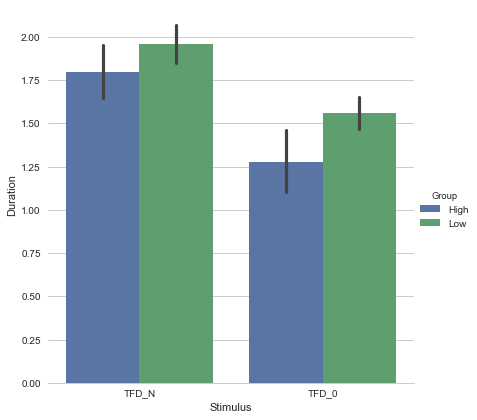

In [77]:
sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='Duration', hue='Group', size=6, kind='bar', data=D_TFD)
_.despine(left=True)

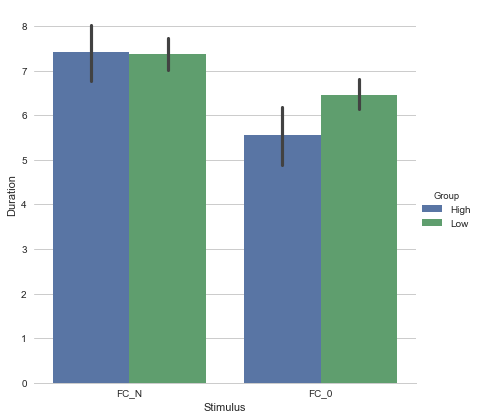

In [80]:
_HighD_FC = HighD_FC.melt(var_name='Stimulus',value_name='Duration')
_HighD_FC['Group'] = 'High'
_LowD_FC = LowD_FC.melt(var_name='Stimulus',value_name='Duration')
_LowD_FC['Group'] = 'Low'
D_FC = pd.concat([_HighD_FC, _LowD_FC])

sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='Duration', hue='Group', size=6, kind='bar', data=D_FC)
_.despine(left=True)

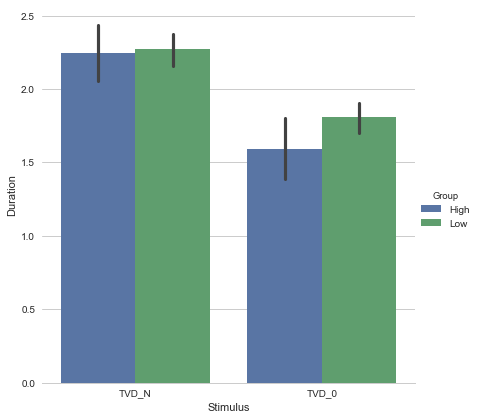

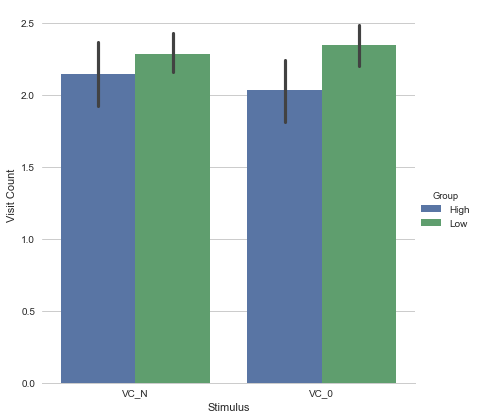

In [96]:
sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='Duration', hue='Group', size=6, kind='bar', data=D_TVD)
_.despine(left=True)

sns.set(style="whitegrid")
_ = sns.factorplot(x='Stimulus', y='Visit Count', hue='Group', size=6, kind='bar', data=D_VC)
_.despine(left=True)

### ANOVA

In [59]:
import statsmodels.api as sm
from pandas.core import datetools

data = 

### Analysis

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [97]:
## Anxiety

X = A_EM[['TFD','TVD','Fix Count','Visit Count']]
y = A_EM['Group']
lr = LogisticRegression()
lr.fit(X,y)
preds = lr.predict(X)

accuracy_score(y,preds)

0.60833333333333328

In [29]:
D_EM[['TFD','TVD','Fix Count','Visit Count']]

,TFD,TVD,Fix Count,Visit Count
0,0.635,1.385,3.0,1.0
1,0.425,1.090,2.5,1.0
2,1.035,1.265,4.0,1.5
3,1.480,1.790,6.5,1.5
4,0.150,0.165,1.5,0.5
5,1.005,1.400,4.0,2.0
6,1.565,1.800,5.0,1.0
7,2.050,2.120,5.0,2.0
8,2.065,2.205,7.0,2.0
9,2.295,2.815,10.0,3.0


In [27]:
## Depression

X = D_EM[['TFD','TVD','Fix Count','Visit Count']]
y = D_EM['Group']
lr = LogisticRegression()
lr.fit(X,y)
preds = lr.predict(X)

accuracy_score(y,preds)

NameError: name 'LogisticRegression' is not defined

In [268]:
D_EM['GroupCode'] = D_EM['Group'].map(lambda x: "1" if "High" in x else "0" if "Low" in x else "")
D_EM['GroupCode'] = D_EM['GroupCode'].astype(int)

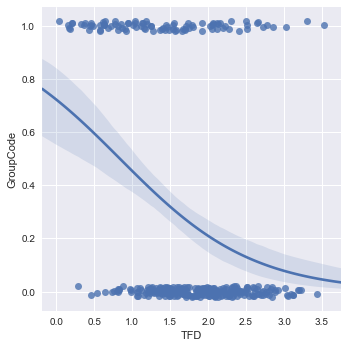

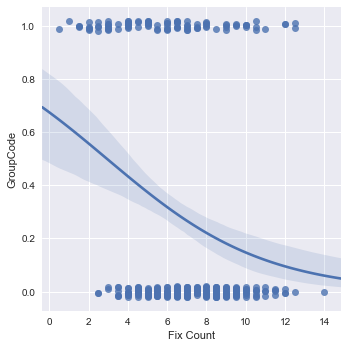

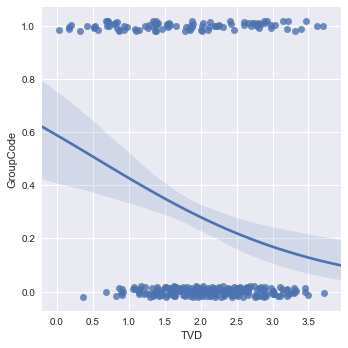

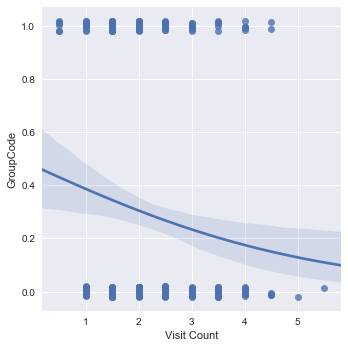

In [157]:
import seaborn as sns
sns.set(style="darkgrid")
EMtype=['TFD','Fix Count']
D_EM['GroupCode'] = D_EM['GroupCode'].astype(float)
#_ = sns.lmplot(x='TFD',y='GroupCode',data=D_EM, logistic=True)

for x in EMtype:
    _ = sns.lmplot(x=x,y='GroupCode',data=D_EM, logistic=True,y_jitter=.02)

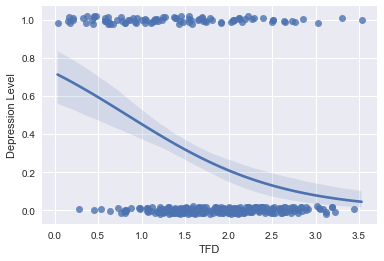

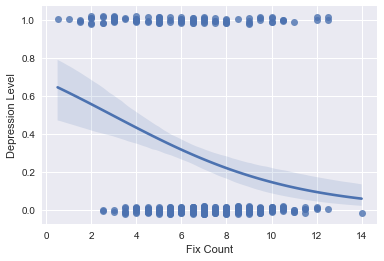

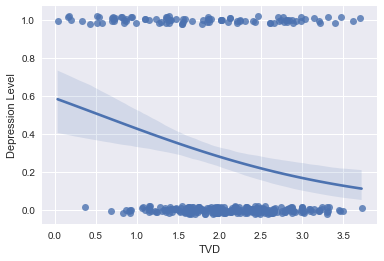

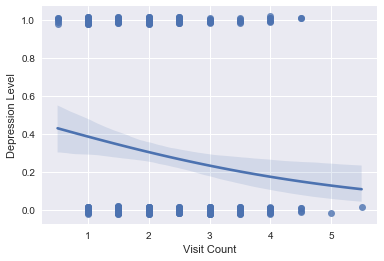

In [173]:
hues = ['b','r','g','m']

for x in EMtype:
    _ = sns.regplot(x=x,y='GroupCode',data=D_EM,y_jitter=.02, logistic=True, truncate=True)
    _ = plt.ylabel('Depression Level')
    plt.show()
    
    

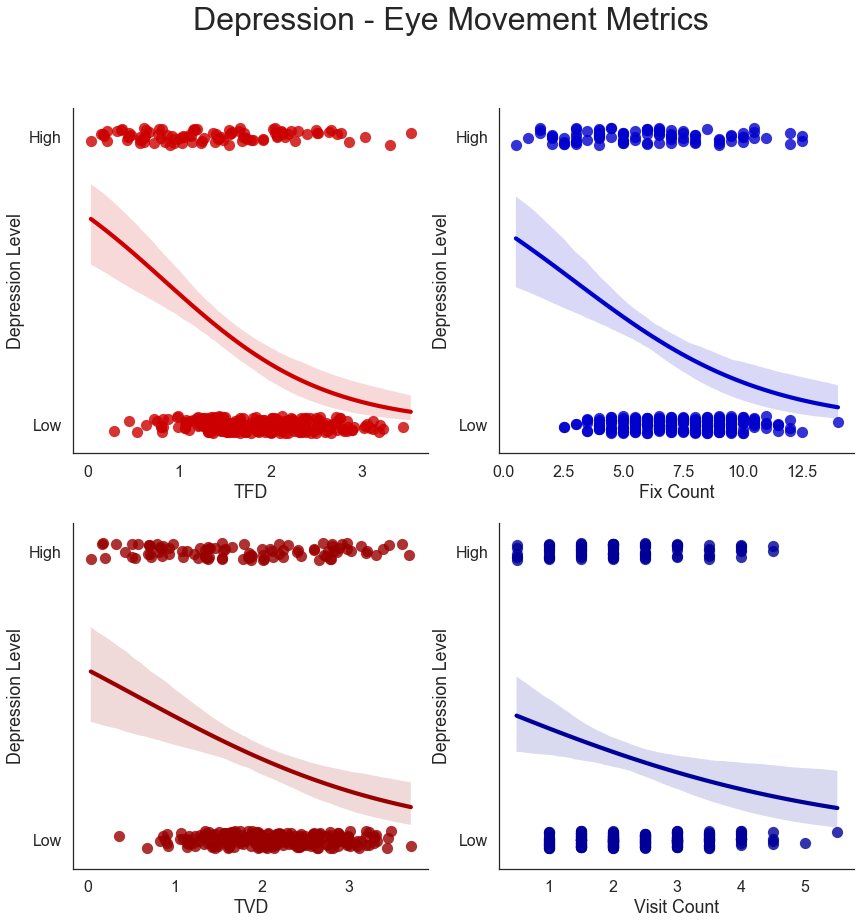

In [269]:
fig, ax = plt.subplots()
fig.set_size_inches(14,14)
plt.subplots_adjust(hspace=.2)
plt.suptitle('Depression - Eye Movement Metrics', fontsize=32)
plt.subplot(221)
_ = sns.set_style("white")
_ = sns.regplot(x='TFD',y='GroupCode',data=D_EM,y_jitter=.03, logistic=True, truncate=True, color='#cc0000')
_ = plt.ylabel('Depression Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

plt.subplot(222)
_ = sns.set_style("white")
_ = sns.regplot(x='Fix Count',y='GroupCode',data=D_EM,y_jitter=.03, logistic=True, truncate=True, color='#0000cc')
_ = plt.ylabel('Depression Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

plt.subplot(223)
_ = sns.set_style("white")
_ = sns.regplot(x='TVD',y='GroupCode',data=D_EM,y_jitter=.03, logistic=True, truncate=True, color='#990000')
_ = plt.ylabel('Depression Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

plt.subplot(224)
_ = sns.set_style("white")
_ = sns.regplot(x='Visit Count',y='GroupCode',data=D_EM,y_jitter=.03, logistic=True, truncate=True, color='#000099')
_ = plt.ylabel('Depression Level')
_ = plt.yticks([0,1],['Low','High'])
_ = sns.despine()
_ = sns.set_context("poster")

## Scrap

In [1]:
HighD_TFD

NameError: name 'HighD_TFD' is not defined

In [82]:
df_2x2['001'].loc[HighA,:].iloc[:,[0,1,2,3]]

,TFD_0_1,TFD_0_2,TFD_F,TFD_T
8,1.02,1.98,2.51,1.00
9,2.45,2.20,1.23,1.70
11,1.78,1.99,0.92,2.65
13,1.65,1.81,2.75,1.53
16,2.40,2.72,1.57,1.93
31,1.52,2.58,1.78,1.03
36,0.45,0.00,0.00,0.32
37,2.03,2.12,2.95,0.70
39,2.38,1.43,1.68,0.77
41,1.60,1.25,2.16,1.12


In [101]:
A_TFD.to_csv('A_TFD.csv')
A_FC.to_csv('A_FC.csv')
A_TVD.to_csv('A_TVD.csv')
A_VC.to_csv('A_VC.csv')
D_TFD.to_csv('D_TFD.csv')
D_FC.to_csv('D_FC.csv')
D_TVD.to_csv('D_TVD.csv')
D_VC.to_csv('D_VC.csv')